# Import Libraries

In [8]:
import os
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
df_original = pd.read_csv('data/wallet_behavior.csv.gz')

print(f"Data shape: {df_original.shape}")
print(f"Memory usage: {df_original.memory_usage(deep=True).sum() / 1e6:.2f} MB")

df_original.head()

Data shape: (1200000, 14)
Memory usage: 387.60 MB


,address,n_sent_tx,n_received_tx,total_sent_eth,total_received_eth,n_unique_counterparties,avg_gas_used_sent,avg_gas_price_gwei_sent,first_tx_time,last_tx_time,days_active_in_window,n_token_sent,n_token_received,n_unique_tokens_moved
0,0x053cae897e0921049c2e80722d79131342bc91ec,8,26,17.665875,1.799945e+01,15,2.100000e+04,0.234971,2025-11-22 20:40:23 UTC,2025-12-09 21:56:11 UTC,17,12,9,19
1,0x89074ef1b6f23737076c234ccc41d428b6800426,4,0,6.561320,0.000000e+00,1,1.240741e+06,1.215176,2025-12-02 16:38:47 UTC,2025-12-09 19:54:23 UTC,7,0,16,13
2,0x62fb4d112ef7b06c3adc4bd0e605383879af2803,53,1,0.000651,2.402326e-03,3,6.211500e+04,0.558433,2025-11-14 18:58:11 UTC,2025-12-12 16:18:11 UTC,27,109,60,32
3,0x2c08cb703ca1126023a2dbc1afccb0a78d7250a5,6,8,2.064938,2.080000e-07,8,4.352533e+04,0.746667,2025-11-17 18:03:59 UTC,2025-11-22 08:53:47 UTC,4,19,6,14
4,0xbb9d0b030698816e025c224f8645e9657c85dc5f,16,3,0.098640,3.000000e-09,3,8.899856e+04,1.155044,2025-11-14 02:47:59 UTC,2025-12-07 04:53:59 UTC,23,84,32,22


In [ ]:
print(df_original.head())

                                      address  n_sent_tx  n_received_tx  \
0  0x053cae897e0921049c2e80722d79131342bc91ec          8             26   
1  0x89074ef1b6f23737076c234ccc41d428b6800426          4              0   
2  0x62fb4d112ef7b06c3adc4bd0e605383879af2803         53              1   
3  0x2c08cb703ca1126023a2dbc1afccb0a78d7250a5          6              8   
4  0xbb9d0b030698816e025c224f8645e9657c85dc5f         16              3   

   total_sent_eth  total_received_eth  n_unique_counterparties  \
0       17.665875        1.799945e+01                       15   
1        6.561320        0.000000e+00                        1   
2        0.000651        2.402326e-03                        3   
3        2.064938        2.080000e-07                        8   
4        0.098640        3.000000e-09                        3   

   avg_gas_used_sent  avg_gas_price_gwei_sent            first_tx_time  \
0       2.100000e+04                 0.234971  2025-11-22 20:40:23 UTC   
1   

# EDA

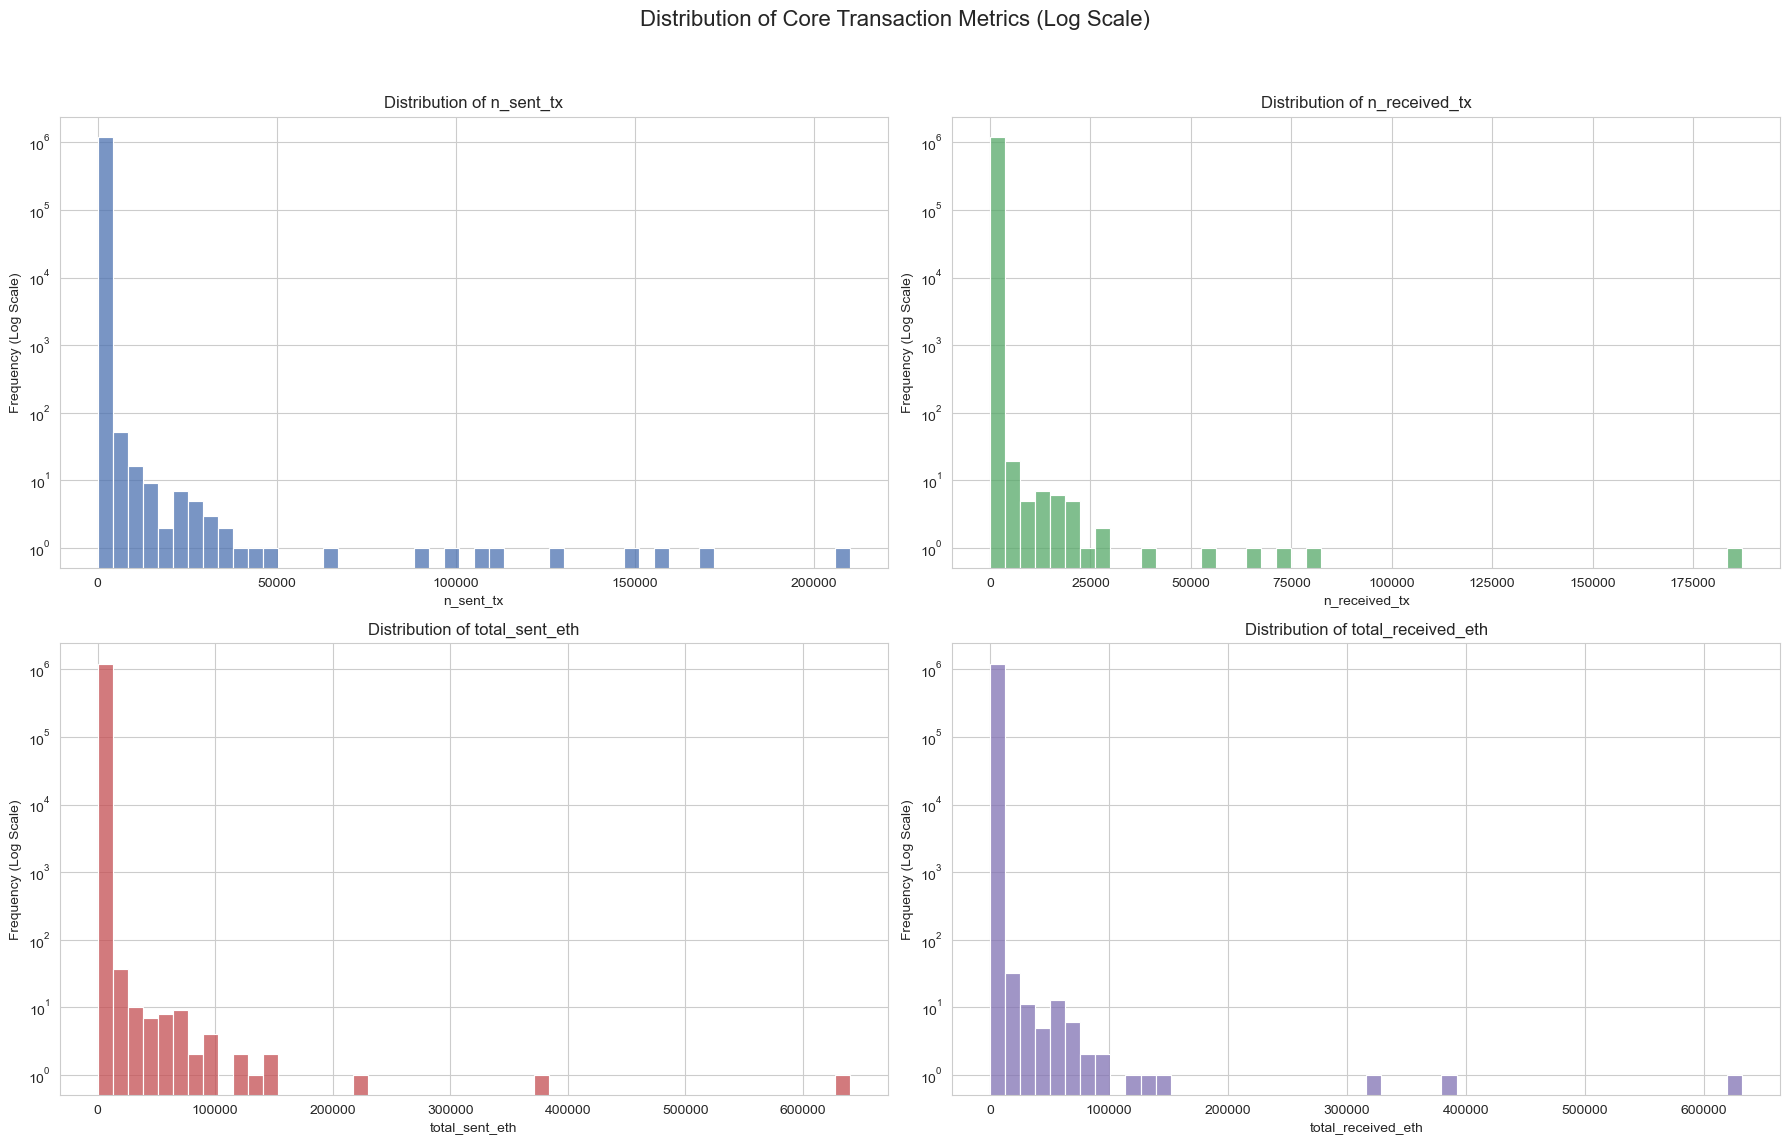

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Core Transaction Metrics (Log Scale)', fontsize=16)

# List of columns to plot
cols = ['n_sent_tx', 'n_received_tx', 'total_sent_eth', 'total_received_eth']
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b3'] # Custom colors for distinction

# Flatten axes for easy iteration (0,0 -> 0,1 -> 1,0 -> 1,1)
axes_flat = axes.flatten()

for i, col in enumerate(cols):
    ax = axes_flat[i]
    
    # We use log=True for the Y-axis to see the "long tail" of whales
    sns.histplot(df[col], bins=50, ax=ax, color=colors[i], kde=False)
    ax.set_yscale('log') 
    
    # Optional: Log X-axis is often useful for ETH values too, but we'll stick to your request for now
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency (Log Scale)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

In [28]:
df.query('n_sent_tx > 200000 | n_received_tx > 100000 | total_sent_eth > 300000 | total_received_eth > 300000')

,address,n_sent_tx,n_received_tx,total_sent_eth,total_received_eth,n_unique_counterparties,avg_gas_used_sent,avg_gas_price_gwei_sent,first_tx_time,last_tx_time,...,n_unique_tokens_moved,total_tx_count,fan_out_ratio,tx_per_day,is_smart_contract_user,log_total_sent_eth,log_n_token_sent,is_token_user,flow_ratio,tx_frequency_per_hour
1767,0xa1abfa21f80ecf401bd41365adbb6fef6fefdf09,109456,73789,375714.477048,381366.355047,58608,90000.000000,2.295454,2025-11-13 00:01:35+00:00,2025-12-12 23:59:11+00:00,...,56,183245,0.319834,6108.166667,True,12.836587,5.768321,True,1.015043e+00,254.521085
5999,0xdfd5293d8e347dfe59e90efd55b2956a1343963d,210024,46,640029.177975,632457.252505,40988,214953.244429,0.333631,2025-11-13 00:00:11+00:00,2025-12-12 23:59:47+00:00,...,267,210070,0.195116,7002.333333,True,13.369271,11.960914,True,9.881694e-01,291.766590
774771,0x00000000219ab540356cbb839cbe05303d7705fa,0,7265,0.000000,316521.942631,3919,NaN,NaN,2025-11-13 00:14:23+00:00,2025-12-12 23:16:11+00:00,...,5,7265,0.539436,242.166667,False,0.000000,0.000000,True,3.165219e+09,10.103890
1008427,0x0000000000000068f116a894984e2db1123eb395,0,187310,0.000000,12531.485784,40624,NaN,NaN,2025-11-13 00:00:23+00:00,2025-12-12 23:59:47+00:00,...,0,187310,0.216881,6243.666667,False,0.000000,0.000000,False,1.253149e+08,260.156391


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


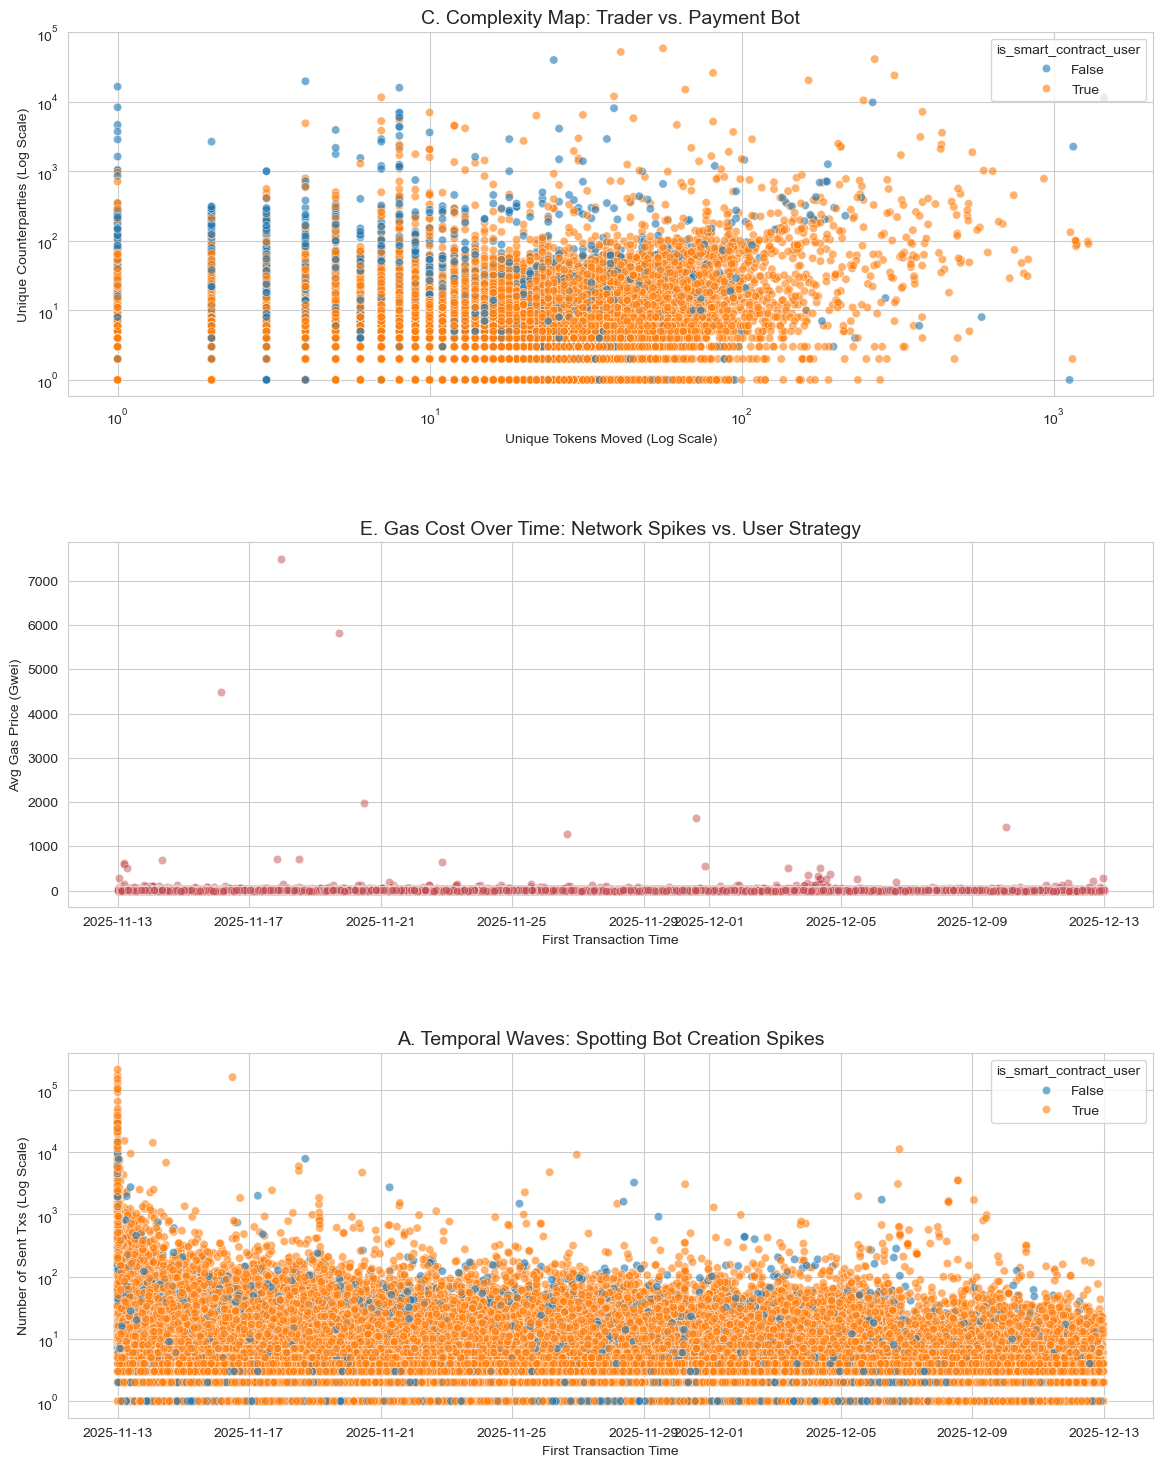

In [30]:
# 0. Pre-processing: Ensure Time columns are actually datetime objects
# (This step is crucial for the X-axis to display dates correctly)
if df['first_tx_time'].dtype == 'O': # Check if it's an object/string
    df['first_tx_time'] = pd.to_datetime(df['first_tx_time'])

# Set the visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 18) # Make the figure tall

# Create 3 subplots arranged vertically
fig, axes = plt.subplots(3, 1)
fig.subplots_adjust(hspace=0.4) # Add space between plots

# --- 1. Complexity Map (Token vs Counterparties) ---
# Goal: Distinguish DEX Traders vs Payment Bots
sns.scatterplot(
    data=df, 
    x='n_unique_tokens_moved', 
    y='n_unique_counterparties', 
    hue='is_smart_contract_user', # Useful extra dimension
    alpha=0.6, 
    ax=axes[0]
)
# Log scales often help here if you have "Whales" skewing the view
axes[0].set_yscale('log')
axes[0].set_xscale('log')
axes[0].set_title('C. Complexity Map: Trader vs. Payment Bot', fontsize=14)
axes[0].set_xlabel('Unique Tokens Moved (Log Scale)')
axes[0].set_ylabel('Unique Counterparties (Log Scale)')


# --- 2. Gas Analysis (Time vs Price) ---
# Goal: Separate "Rich Users" from "Network Congestion"
sns.scatterplot(
    data=df, 
    x='first_tx_time', 
    y='avg_gas_price_gwei_sent', 
    alpha=0.5,
    color='#c44e52', # Red color for "Cost"
    ax=axes[1]
)
axes[1].set_title('E. Gas Cost Over Time: Network Spikes vs. User Strategy', fontsize=14)
axes[1].set_ylabel('Avg Gas Price (Gwei)')
axes[1].set_xlabel('First Transaction Time')


# --- 3. Temporal Waves (Time vs Volume) ---
# Goal: Spot "Bot Waves" (Simultaneous Creations)
sns.scatterplot(
    data=df, 
    x='first_tx_time', 
    y='n_sent_tx', 
    hue='is_smart_contract_user',
    alpha=0.6,
    ax=axes[2]
)
axes[2].set_yscale('log') # Log scale for volume
axes[2].set_title('A. Temporal Waves: Spotting Bot Creation Spikes', fontsize=14)
axes[2].set_ylabel('Number of Sent Txs (Log Scale)')
axes[2].set_xlabel('First Transaction Time')

plt.show()

In [ ]:
df = df_original.copy()
# 1. Feature: "Fan-out Ratio" (Network Diversity)
# Logic: If I send 100 txs to 1 person, my ratio is 0.01 (Low diversity).
#        If I send 100 txs to 100 people, my ratio is 1.0 (High diversity/Spam/Airdrop).
df['total_tx_count'] = df['n_sent_tx'] + df['n_received_tx']
df['fan_out_ratio'] = df['n_unique_counterparties'] / df['total_tx_count']

# 2. Feature: "Burstiness" (Intensity)
# Logic: How many transactions per active day?
# Add a small epsilon (0.001) to avoid division by zero for single-day users
df['tx_per_day'] = df['total_tx_count'] / (df['days_active_in_window'] + 1)

# 3. Feature: "DeFi Sophistication" (Behavioral Flag)
# Logic: Simple ETH transfers cost 21,000 gas. Anything significantly higher implies Smart Contracts.
df['is_smart_contract_user'] = df['avg_gas_used_sent'] > 21000

# 4. Feature: "Whale vs. Minnow" (Log Transforms)
# Financial data is skewed. Log-transforming helps models (and plots) see patterns better.
# We use log1p to handle zeros safely (log(0+1))
df['log_total_sent_eth'] = np.log1p(df['total_sent_eth'])
df['log_n_token_sent'] = np.log1p(df['n_token_sent'])

print("New risk features engineered!")

New risk features engineered!


In [15]:
print(df.head())

                                      address  n_sent_tx  n_received_tx  \
0  0x053cae897e0921049c2e80722d79131342bc91ec          8             26   
1  0x89074ef1b6f23737076c234ccc41d428b6800426          4              0   
2  0x62fb4d112ef7b06c3adc4bd0e605383879af2803         53              1   
3  0x2c08cb703ca1126023a2dbc1afccb0a78d7250a5          6              8   
4  0xbb9d0b030698816e025c224f8645e9657c85dc5f         16              3   

   total_sent_eth  total_received_eth  n_unique_counterparties  \
0       17.665875        1.799945e+01                       15   
1        6.561320        0.000000e+00                        1   
2        0.000651        2.402326e-03                        3   
3        2.064938        2.080000e-07                        8   
4        0.098640        3.000000e-09                        3   

   avg_gas_used_sent  avg_gas_price_gwei_sent            first_tx_time  \
0       2.100000e+04                 0.234971  2025-11-22 20:40:23 UTC   
1   

/var/folders/9j/_8sx8kxj7cl3vnn7_kxmts1m0000gn/T/ipykernel_98834/2066587247.py:42: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


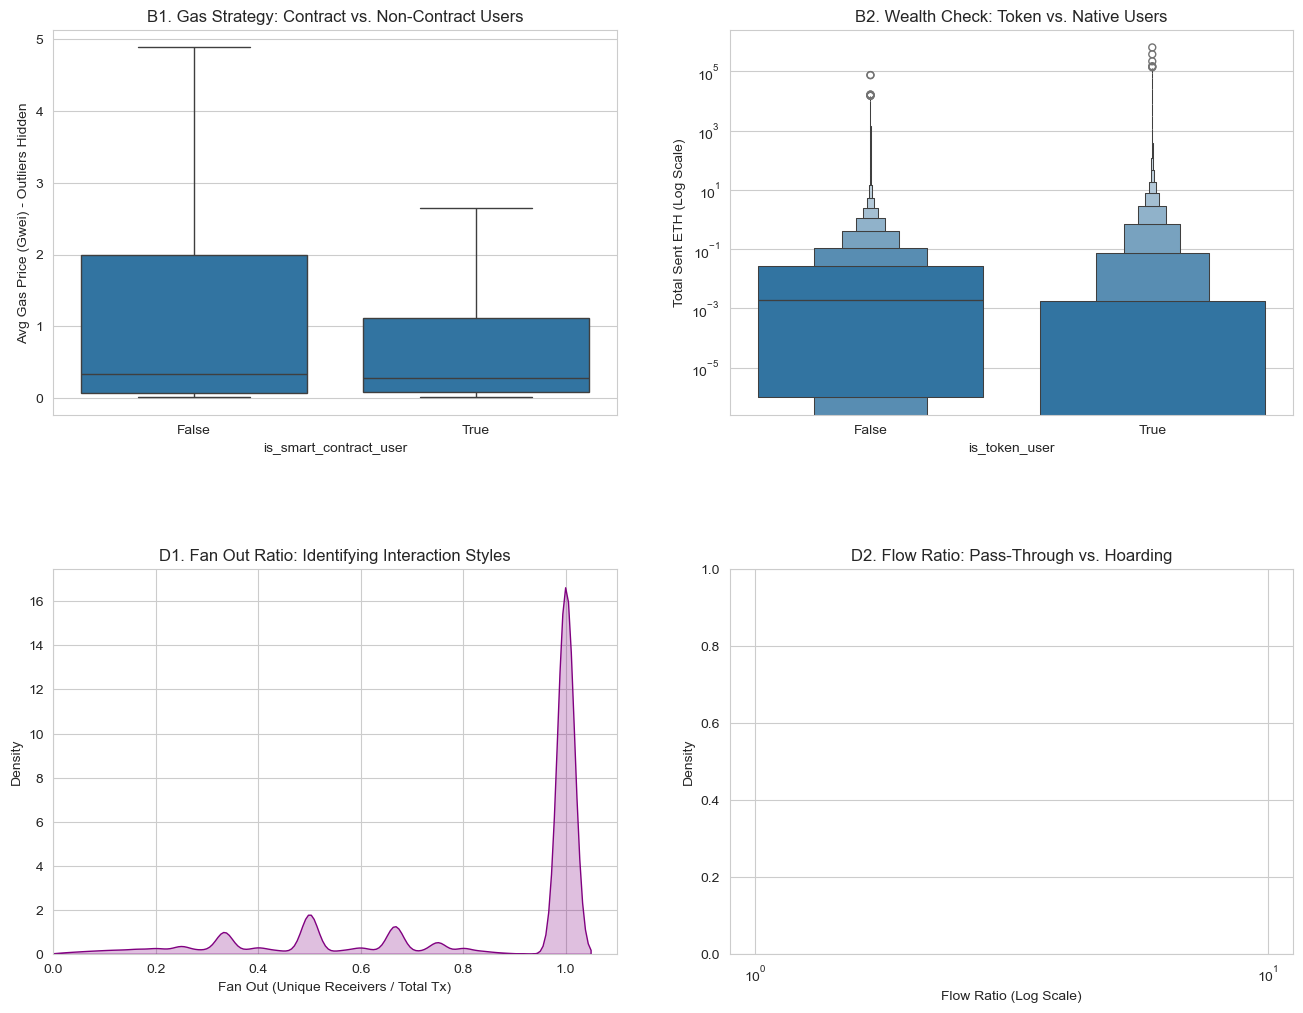

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4) # Add breathing room

# --- B. Categorical Features (Smart Contract / Token Usage) ---
# Question: Do Smart Contract users pay higher gas fees?
sns.boxplot(
    data=df, 
    x='is_smart_contract_user', 
    y='avg_gas_price_gwei_sent', 
    showfliers=False, # Hide extreme outliers to see the median clearly
    ax=axes[0, 0]
)
axes[0, 0].set_title('B1. Gas Strategy: Contract vs. Non-Contract Users')
axes[0, 0].set_ylabel('Avg Gas Price (Gwei) - Outliers Hidden')

# Question: Do Token Users hold more ETH volume? (Log Scale)
sns.boxenplot( # Boxenplot is better for large datasets than Boxplot
    data=df,
    x='is_token_user',
    y='total_sent_eth',
    ax=axes[0, 1]
)
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('B2. Wealth Check: Token vs. Native Users')
axes[0, 1].set_ylabel('Total Sent ETH (Log Scale)')


# --- D. Ratio / Behavioral Metrics (Distributions) ---
# Insight: Fan Out Ratio (1.0 = Always new people, 0.0 = Always same people)
sns.kdeplot(
    data=df, 
    x='fan_out_ratio', 
    fill=True, 
    color='purple',
    ax=axes[1, 0]
)
axes[1, 0].set_title('D1. Fan Out Ratio: Identifying Interaction Styles')
axes[1, 0].set_xlabel('Fan Out (Unique Receivers / Total Tx)')
axes[1, 0].set_xlim(0, 1.1) # Ratio is always 0-1

# Insight: Flow Ratio (In vs Out Balance)
sns.kdeplot(
    data=df, 
    x='flow_ratio', 
    fill=True, 
    color='orange',
    log_scale=True, # Log scale because ratios can be tiny or huge
    ax=axes[1, 1]
)
axes[1, 1].set_title('D2. Flow Ratio: Pass-Through vs. Hoarding')
axes[1, 1].set_xlabel('Flow Ratio (Log Scale)')

plt.show()

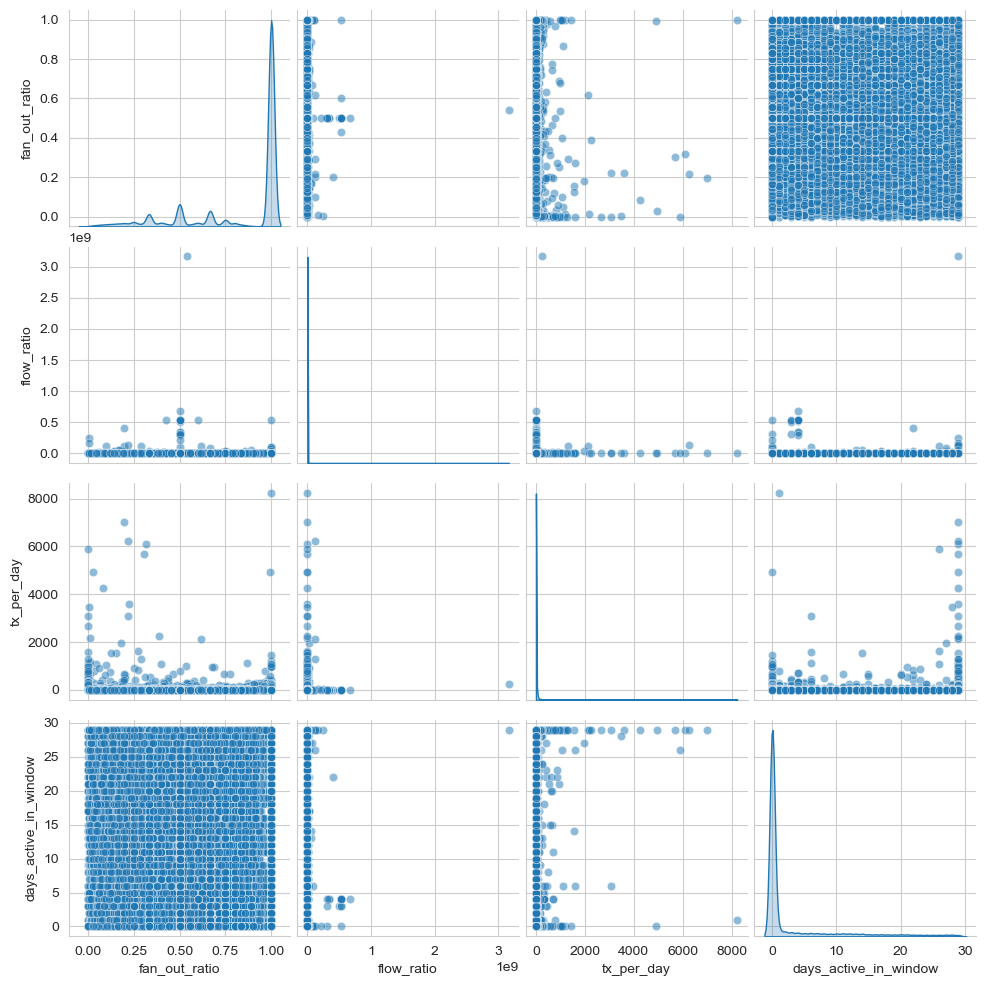

In [29]:
# Focus on behavior, not raw volume
behavior_cols = ['fan_out_ratio', 'flow_ratio', 'tx_per_day', 'days_active_in_window']

sns.pairplot(df[behavior_cols], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

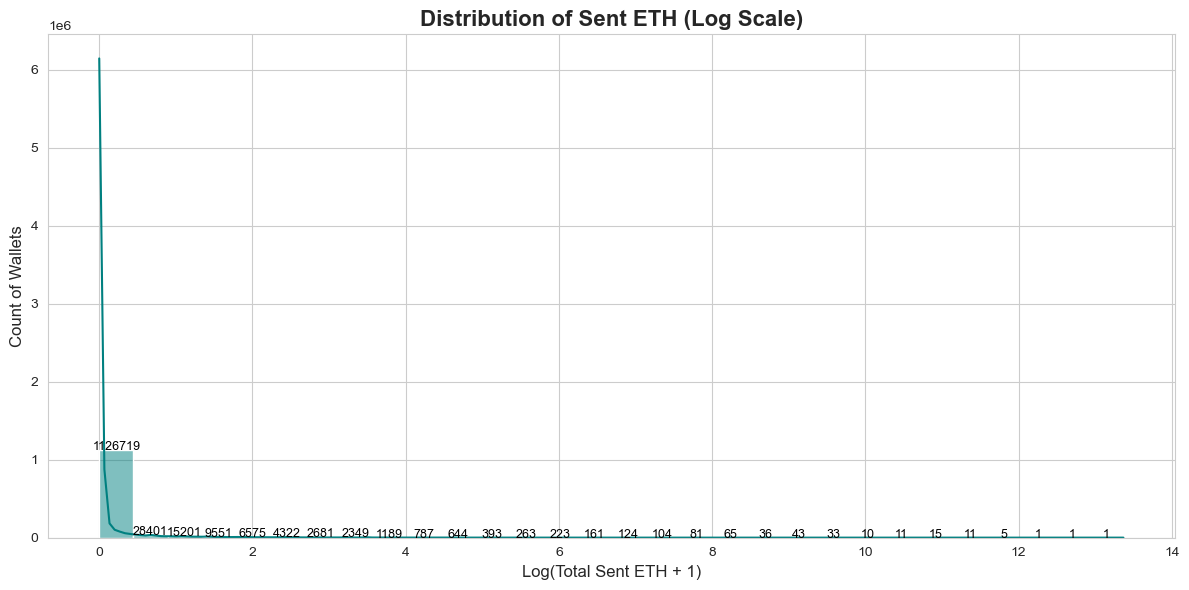

In [11]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# --- PRE-PROCESSING ---
# Create the features if you haven't already
# Handle log transformations safely (log1p handles 0s)
# df['log_total_sent_eth'] = np.log1p(df['total_sent_eth'])
df['is_token_user'] = df['n_unique_tokens_moved'] > 0

# --- CHART 1: The "Power Law" Check (Histogram) ---
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['log_total_sent_eth'], bins=30, kde=True, color='teal')

plt.title('Distribution of Sent ETH (Log Scale)', fontsize=16, fontweight='bold')
plt.xlabel('Log(Total Sent ETH + 1)', fontsize=12)
plt.ylabel('Count of Wallets', fontsize=12)

# Add data labels above bars
for p in ax.patches:
    height = p.get_height()
    if height > 0: # Only label non-empty bins
        ax.text(p.get_x() + p.get_width() / 2., height + 500, # Position
                f'{int(height)}', # Label text
                ha="center", fontsize=9, color='black', rotation=0)

plt.tight_layout()
plt.show()

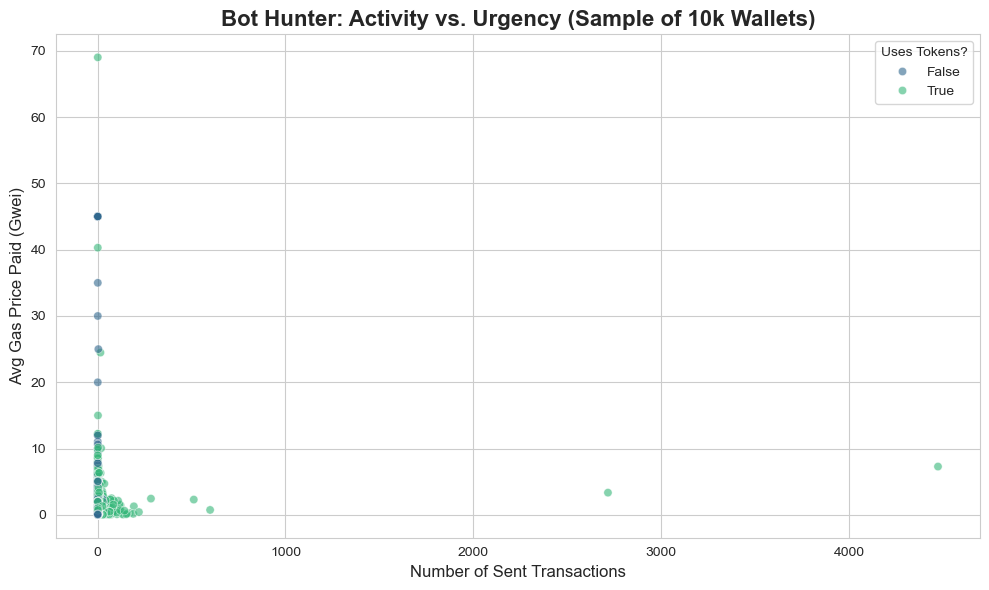

In [12]:
# --- CHART 2: The "Bot Hunter" (Scatter Plot) ---
# NOTE: We sample 10,000 points to prevent crashing the notebook with 1M+ dots
sample_df = df.sample(n=10000, random_state=42)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sample_df,
    x='n_sent_tx',
    y='avg_gas_price_gwei_sent',
    hue='is_token_user', # Color by token usage
    alpha=0.6,
    palette='viridis'
)

plt.title('Bot Hunter: Activity vs. Urgency (Sample of 10k Wallets)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Sent Transactions', fontsize=12)
plt.ylabel('Avg Gas Price Paid (Gwei)', fontsize=12)
plt.legend(title='Uses Tokens?', loc='upper right')
plt.tight_layout()
plt.show()

/var/folders/9j/_8sx8kxj7cl3vnn7_kxmts1m0000gn/T/ipykernel_98834/1531887788.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_token_user', y='avg_gas_used_sent', data=df, palette='coolwarm', showfliers=False)
/var/folders/9j/_8sx8kxj7cl3vnn7_kxmts1m0000gn/T/ipykernel_98834/1531887788.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(xtick, medians[xtick] + vertical_offset,
/var/folders/9j/_8sx8kxj7cl3vnn7_kxmts1m0000gn/T/ipykernel_98834/1531887788.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). T

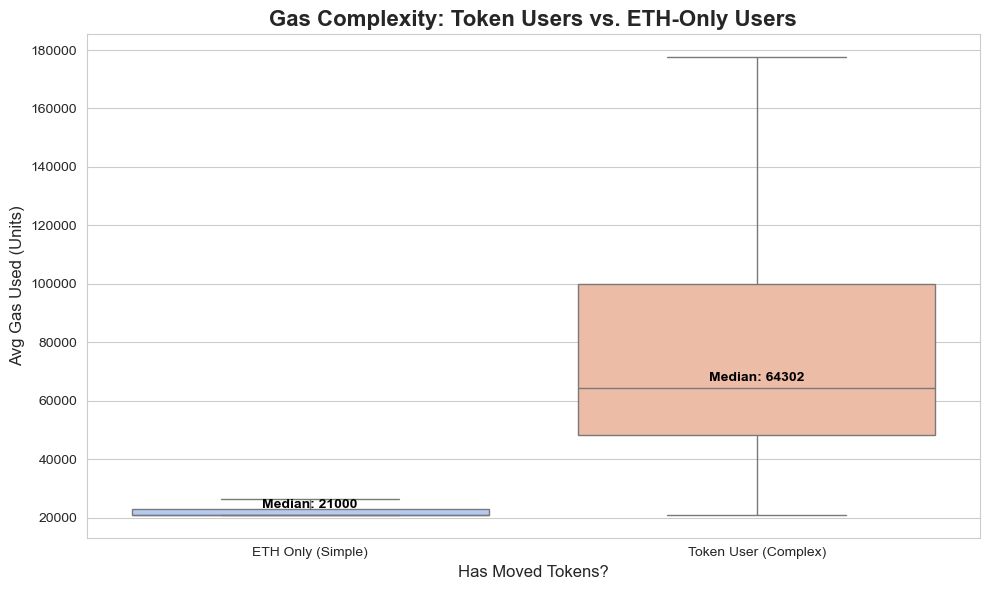

In [13]:
# --- CHART 3: The "DeFi vs. Simple" Split (Box Plot) ---
plt.figure(figsize=(10, 6))
# showfliers=False hides the extreme outliers so you can actually see the box
sns.boxplot(x='is_token_user', y='avg_gas_used_sent', data=df, palette='coolwarm', showfliers=False)

plt.title('Gas Complexity: Token Users vs. ETH-Only Users', fontsize=16, fontweight='bold')
plt.xlabel('Has Moved Tokens?', fontsize=12)
plt.ylabel('Avg Gas Used (Units)', fontsize=12)
plt.xticks([0, 1], ['ETH Only (Simple)', 'Token User (Complex)'])

# Add median labels
medians = df.groupby('is_token_user')['avg_gas_used_sent'].median()
vertical_offset = df['avg_gas_used_sent'].median() * 0.05
for xtick in [0, 1]:
    plt.text(xtick, medians[xtick] + vertical_offset,
             f'Median: {medians[xtick]:.0f}',
             horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.tight_layout()
plt.show()

<Axes: xlabel='flow_ratio', ylabel='Count'>

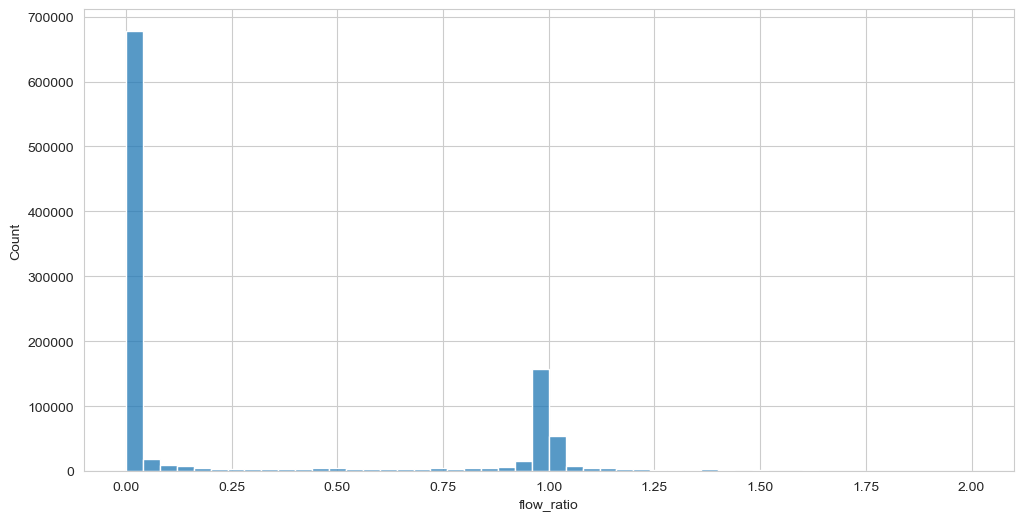

In [14]:
# Calculate Flow Ratio (Handle division by zero)
df['flow_ratio'] = df['total_received_eth'] / (df['total_sent_eth'] + 0.0001)

# Plot
# Look for a spike exactly at 1.0 (Pass-through behavior)
sns.histplot(df[df['flow_ratio'] < 2]['flow_ratio'], bins=50)

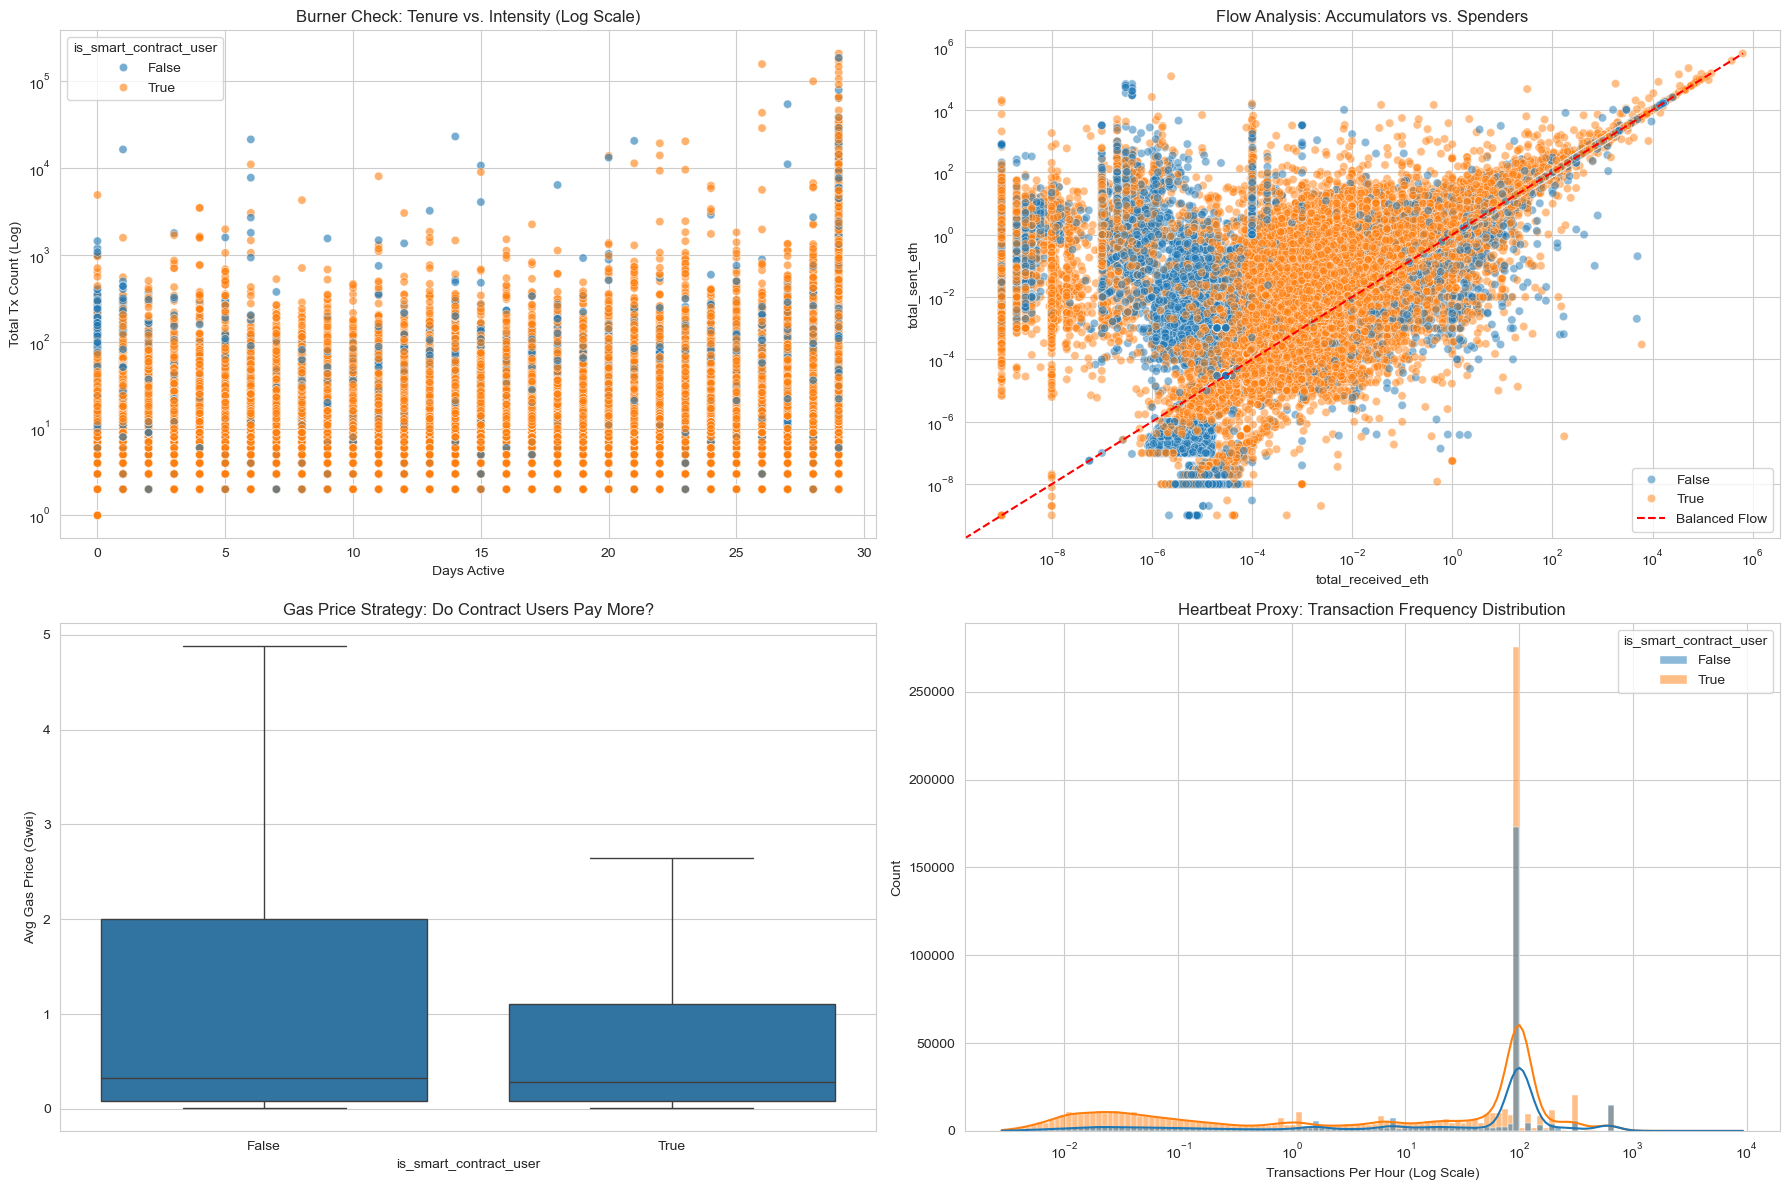

In [17]:
df['first_tx_time'] = pd.to_datetime(df['first_tx_time'])
df['last_tx_time'] = pd.to_datetime(df['last_tx_time'])

# Set style
sns.set_style("whitegrid")

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- PLOT 1: The "Burner Bot" Matrix ---
sns.scatterplot(
    data=df, 
    x='days_active_in_window', 
    y='total_tx_count', 
    hue='is_smart_contract_user',
    alpha=0.6, 
    ax=axes[0, 0]
)
axes[0, 0].set_yscale('log') # Log scale is crucial for Tx counts
axes[0, 0].set_title('Burner Check: Tenure vs. Intensity (Log Scale)')
axes[0, 0].set_xlabel('Days Active')
axes[0, 0].set_ylabel('Total Tx Count (Log)')

# --- PLOT 2: Flow Analysis (In vs. Out) ---
sns.scatterplot(
    data=df, 
    x='total_received_eth', 
    y='total_sent_eth', 
    hue='is_smart_contract_user',
    alpha=0.5,
    ax=axes[0, 1]
)
# Add a diagonal line (Equilibrium)
max_val = max(df['total_received_eth'].max(), df['total_sent_eth'].max())
axes[0, 1].plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Balanced Flow')
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Flow Analysis: Accumulators vs. Spenders')
axes[0, 1].legend()

# --- PLOT 3: Gas Price Sensitivity (Bot Detection) ---
# Filter out extreme outliers for better visualization if needed
sns.boxplot(
    data=df, 
    x='is_smart_contract_user', 
    y='avg_gas_price_gwei_sent', 
    showfliers=False, # Hides extreme outliers to see the median better
    ax=axes[1, 0]
)
axes[1, 0].set_title('Gas Price Strategy: Do Contract Users Pay More?')
axes[1, 0].set_ylabel('Avg Gas Price (Gwei)')

# --- PLOT 4: The "Heartbeat" Proxy (Tx Frequency) ---
# Calculate a simple "Tx per Hour" metric
# (Avoid division by zero by adding a small epsilon or max)
duration_hours = (df['last_tx_time'] - df['first_tx_time']).dt.total_seconds() / 3600
df['tx_frequency_per_hour'] = df['total_tx_count'] / duration_hours.replace(0, 0.01)

sns.histplot(
    data=df, 
    x='tx_frequency_per_hour', 
    hue='is_smart_contract_user', 
    log_scale=True, 
    kde=True,
    ax=axes[1, 1]
)
axes[1, 1].set_title('Heartbeat Proxy: Transaction Frequency Distribution')
axes[1, 1].set_xlabel('Transactions Per Hour (Log Scale)')

plt.tight_layout()
plt.show()

In [33]:
import numpy as np
import pandas as pd

print("=== 1. HISTOGRAM DATA (Core Metrics) ===")
# We use numpy to replicate the histogram binning
core_cols = ['n_sent_tx', 'n_received_tx', 'total_sent_eth', 'total_received_eth']

for col in core_cols:
    print(f"\n--- Distribution for {col} (Log Scale) ---")
    # We filter out 0s for log stats to avoid errors
    data = df[df[col] > 0][col]
    
    if len(data) == 0:
        print("No non-zero data found.")
        continue
        
    # Get basic stats
    print(data.describe().to_string())
    
    # Calculate Histogram Bins (Log Space to match your plots)
    # We create 10 bins to keep the output readable for the chat
    hist, bin_edges = np.histogram(np.log10(data), bins=10)
    
    print("\nLog10 Binned Frequencies (Power Law Check):")
    for i in range(len(hist)):
        lower = 10**bin_edges[i]
        upper = 10**bin_edges[i+1]
        print(f"Range [{lower:.2f} - {upper:.2f}]: {hist[i]} users")

print("\n" + "="*40)
print("=== 2. CATEGORICAL INSIGHTS (Box Plots) ===")

print("\n--- Gas Price Strategy (Contract vs Non-Contract) ---")
print(df.groupby('is_smart_contract_user')['avg_gas_price_gwei_sent'].describe()[['count', 'mean', '50%', 'max']])

print("\n--- Wealth Check (Token User vs Native) ---")
# '50%' is the Median
print(df.groupby('is_token_user')['total_sent_eth'].describe()[['count', 'mean', '50%', 'max']])

print("\n" + "="*40)
print("=== 3. SCATTER PLOT QUADRANTS (Risk Analysis) ===")

print("\n--- Burner Bot Check (Days vs Tx) ---")
# Quadrant Logic:
# Burner = Active < 2 days AND Tx > 10
# Loyal = Active > 30 days
burners = df[(df['days_active_in_window'] < 2) & (df['n_sent_tx'] > 10)]
loyal = df[df['days_active_in_window'] > 30]
print(f"Potential Burner Bots (High Tx, <2 Days): {len(burners)} ({len(burners)/len(df)*100:.2f}%)")
print(f"Loyal/Long-term Users (>30 Days): {len(loyal)} ({len(loyal)/len(df)*100:.2f}%)")

print("\n--- Complexity Map (Tokens vs Counterparties) ---")
# Logic:
# DEX Trader = High Tokens (>5), Low Counterparties (<5)
# Payment Bot = Low Tokens (<2), High Counterparties (>20)
dex_traders = df[(df['n_unique_tokens_moved'] > 5) & (df['n_unique_counterparties'] < 5)]
payment_bots = df[(df['n_unique_tokens_moved'] < 2) & (df['n_unique_counterparties'] > 20)]
print(f"Profile: DEX Traders (High Token/Low Peers): {len(dex_traders)}")
print(f"Profile: Payment/Distributors (Low Token/High Peers): {len(payment_bots)}")

print("\n" + "="*40)
print("=== 4. TEMPORAL & GAS WAVES ===")

print("\n--- Temporal Spikes (When were users created?) ---")
# Resample by Week to find the "Waves"
creation_waves = df.set_index('first_tx_time').resample('W')['address'].count()
print("Top 5 Weeks for New Wallet Creations:")
print(creation_waves.sort_values(ascending=False).head(5))

print("\n--- Gas Wars (High Gas Events) ---")
# Filter for high gas price (> 100 Gwei is usually expensive)
high_gas = df[df['avg_gas_price_gwei_sent'] > 100]
print(f"Number of Transactions with Gas > 100 Gwei: {len(high_gas)}")
if len(high_gas) > 0:
    print("Most recent high-gas date:")
    print(high_gas['first_tx_time'].max())

print("\n" + "="*40)
print("=== 5. BEHAVIORAL RATIOS (KDE Underlying Data) ===")

print("\n--- Fan Out Ratio (Interaction Style) ---")
# Instead of KDE numbers, percentiles tell the story better
print(df['fan_out_ratio'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99]))
print(f"Users with Ratio approx 1.0 (Always new people): {len(df[df['fan_out_ratio'] > 0.95])}")
print(f"Users with Ratio approx 0.0 (Same people): {len(df[df['fan_out_ratio'] < 0.05])}")

print("\n--- Flow Ratio (Pass-Through Check) ---")
# Count distinct spikes
print(f"Pure Pass-Through (Ratio 0.9-1.1): {len(df[df['flow_ratio'].between(0.9, 1.1)])}")
print(f"Accumulators (Ratio < 0.1): {len(df[df['flow_ratio'] < 0.1])}")

=== 1. HISTOGRAM DATA (Core Metrics) ===

--- Distribution for n_sent_tx (Log Scale) ---
count    1.168792e+06
mean     5.898673e+00
std      4.220432e+02
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.100240e+05

Log10 Binned Frequencies (Power Law Check):
Range [1.00 - 3.41]: 980770 users
Range [3.41 - 11.60]: 142141 users
Range [11.60 - 39.51]: 36582 users
Range [39.51 - 134.56]: 7334 users
Range [134.56 - 458.28]: 1303 users
Range [458.28 - 1560.85]: 422 users
Range [1560.85 - 5316.04]: 149 users
Range [5316.04 - 18105.69]: 59 users
Range [18105.69 - 61665.47]: 22 users
Range [61665.47 - 210024.00]: 10 users

--- Distribution for n_received_tx (Log Scale) ---
count    566430.000000
mean          4.715156
std         337.242088
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max      187310.000000

Log10 Binned Frequencies (Power Law Check):
Range [1.00 - 3.37]: 501400 users
Range [3.37 -

In [ ]:
df['log_total_sent_eth'] = np.log1p(df['total_sent_eth'])
df['is_token_user'] = df['n_unique_tokens_moved'] > 0
df['flow_ratio'] = df['total_received_eth'] / (df['total_sent_eth'] + 0.0001)

print("=== NUMERICAL ANALYSIS REPORT ===")

# --- CHART 1: The "Power Law" Check (Histogram) ---
print("\n" + "="*40)
print("CHART 1: Power Law Check (Log Total Sent ETH)")
print("="*40)

# 1. Basic Stats
print("\n[Summary Statistics: Raw Total Sent ETH]")
print(df['total_sent_eth'].describe().to_string())

# 2. Histogram Data (Bin Counts)
# We use the same 'bins=30' as your plot
counts, bin_edges = np.histogram(df['log_total_sent_eth'], bins=30)

print("\n[Histogram Bins - Where are the wallets clustered?]")
print(f"{'Bin Range (Log)':<20} | {'True Value Range (ETH)':<25} | {'Count':<10}")
print("-" * 65)

for i in range(len(counts)):
    if counts[i] > 0: # Only show non-empty bins for clarity
        log_start = bin_edges[i]
        log_end = bin_edges[i+1]
        
        # Convert back from log1p to ETH for readability: exp(x) - 1
        eth_start = np.expm1(log_start)
        eth_end = np.expm1(log_end)
        
        print(f"{log_start:.2f} - {log_end:.2f}      | {eth_start:.4f} - {eth_end:.4f} ETH       | {counts[i]}")


# --- CHART 2: The "Bot Hunter" (Scatter Plot) ---
print("\n" + "="*40)
print("CHART 2: Bot Hunter (Activity vs Urgency)")
print("="*40)

# We want to see if High Activity correlates with High Gas
corr = df[['n_sent_tx', 'avg_gas_price_gwei_sent']].corr().iloc[0,1]
print(f"\n[Correlation] Activity vs Gas Price: {corr:.4f}")
print("(Positive = More active users pay more gas. Near 0 = No link.)")

# Define Quadrants for the "Hunter" aspect
# High Activity: Top 10% of Tx Count
# High Urgency: Top 10% of Gas Price
tx_threshold = df['n_sent_tx'].quantile(0.90)
gas_threshold = df['avg_gas_price_gwei_sent'].quantile(0.90)

high_activity_high_gas = df[(df['n_sent_tx'] > tx_threshold) & (df['avg_gas_price_gwei_sent'] > gas_threshold)]
low_activity_high_gas = df[(df['n_sent_tx'] <= tx_threshold) & (df['avg_gas_price_gwei_sent'] > gas_threshold)]

print(f"\n[Quadrant Analysis]")
print(f"Thresholds -> High Activity > {tx_threshold:.0f} txs | High Gas > {gas_threshold:.2f} Gwei")
print(f"1. 'Urgent Bots/Whales' (High Tx + High Gas): {len(high_activity_high_gas)} wallets")
print(f"2. 'Desperate/New Users' (Low Tx + High Gas): {len(low_activity_high_gas)} wallets")


# --- CHART 3: DeFi vs Simple (Box Plot) ---
print("\n" + "="*40)
print("CHART 3: Gas Complexity (DeFi vs Simple)")
print("="*40)

# GroupBy Describe gives us the Box Plot stats (25%, 50%, 75%)
# 25% = Bottom of box, 50% = Median line, 75% = Top of box
stats = df.groupby('is_token_user')['avg_gas_used_sent'].describe()
print("\n[Gas Used Statistics by User Type]")
print(stats[['count', 'mean', '25%', '50%', '75%', 'max']].to_string())

# Calculate the "Complexity Premium"
simple_median = stats.loc[False, '50%']
defi_median = stats.loc[True, '50%']
print(f"\n[Insight] DeFi users use {defi_median/simple_median:.1f}x more gas per tx than simple users.")


# --- CHART 4: Flow Ratio (Histogram) ---
print("\n" + "="*40)
print("CHART 4: Flow Ratio (Pass-Through Analysis)")
print("="*40)

# Focus on the region of interest (< 2.0)
subset = df[df['flow_ratio'] < 2]['flow_ratio']
counts, bin_edges = np.histogram(subset, bins=50)

# Find the peak bin (The tallest bar)
max_bin_idx = np.argmax(counts)
peak_start = bin_edges[max_bin_idx]
peak_end = bin_edges[max_bin_idx+1]

print(f"\n[Distribution Peak]")
print(f"Most common Flow Ratio is between {peak_start:.2f} and {peak_end:.2f} with {counts[max_bin_idx]} wallets.")

# Exact spike check (Pass-throughs)
pass_throughs = df[df['flow_ratio'].between(0.99, 1.01)]
print(f"Wallets with Ratio ~1.0 (Exact Pass-Through): {len(pass_throughs)}")
accumulators = df[df['flow_ratio'] < 0.1]
print(f"Wallets with Ratio < 0.1 (Accumulators/Savers): {len(accumulators)}")


# --- CHART 5: Pair Plot (Behavioral Correlations) ---
print("\n" + "="*40)
print("CHART 5: Behavioral Correlations (Pair Plot)")
print("="*40)

behavior_cols = ['fan_out_ratio', 'flow_ratio', 'tx_per_day', 'days_active_in_window']

print("\n[Correlation Matrix - How do features relate?]")
# 1.0 = Perfect positive correlation, -1.0 = Perfect negative correlation
print(df[behavior_cols].corr().round(2).to_string())

print("\n[Outlier Check - Top 5% of each behavior]")
for col in behavior_cols:
    threshold = df[col].quantile(0.95)
    count = len(df[df[col] > threshold])
    print(f"Top 5% threshold for {col}: > {threshold:.2f}")

=== NUMERICAL ANALYSIS REPORT ===

CHART 1: Power Law Check (Log Total Sent ETH)

[Summary Statistics: Raw Total Sent ETH]
count    1.200000e+06
mean     5.795322e+00
std      8.414303e+02
min      0.000000e+00
25%      0.000000e+00
50%      5.545500e-06
75%      1.089521e-02
max      6.400292e+05

[Histogram Bins - Where are the wallets clustered?]
Bin Range (Log)      | True Value Range (ETH)    | Count     
-----------------------------------------------------------------
0.00 - 0.45      | 0.0000 - 0.5615 ETH       | 1126719
0.45 - 0.89      | 0.5615 - 1.4383 ETH       | 28401
0.89 - 1.34      | 1.4383 - 2.8073 ETH       | 15201
1.34 - 1.78      | 2.8073 - 4.9451 ETH       | 9551
1.78 - 2.23      | 4.9451 - 8.2833 ETH       | 6575
2.23 - 2.67      | 8.2833 - 13.4957 ETH       | 4322
2.67 - 3.12      | 13.4957 - 21.6350 ETH       | 2681
3.12 - 3.57      | 21.6350 - 34.3444 ETH       | 2349
3.57 - 4.01      | 34.3444 - 54.1900 ETH       | 1189
4.01 - 4.46      | 54.1900 - 85.1787 ETH